In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/raw.csv")

In [4]:
df["REASON"].fillna(value="DebtCon", inplace=True) # REASON : DebtCon = debt consolidation
df["JOB"].fillna(value="Other", inplace=True)      # JOB : Six occupational categories
df["DEROG"].fillna(value=0, inplace=True)          # DEROG : Number of major derogatory reports
df["DELINQ"].fillna(value=0, inplace=True)         # DELINQ : Number of delinquent credit lines
df.fillna(value=df.mean(), inplace=True)

In [5]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.0,0.0,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.0,0.0,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.0,0.0,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.0,0.0,213.892709,0.000000,16.000000,34.340882


In [10]:
df.to_csv('../data/filled.csv', index=False)

In [11]:
p_df = pd.read_csv("../data/filled.csv")
p_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.0,0.0,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.0,0.0,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.0,0.0,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.0,0.0,213.892709,0.000000,16.000000,34.340882


In [13]:
p_df.rename(columns={"BAD" : "target"}, inplace=True)
p_df

,target,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.0,0.0,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.0,0.0,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.0,0.0,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.0,0.0,213.892709,0.000000,16.000000,34.340882


In [14]:
p_df.to_csv('../data/woe/data.csv', index=False)

Применяем WoE+LogReg

In [5]:
# !pip install woe

In [6]:
import os
import numpy as np
import pandas as pd
import woe.feature_process as fp
import woe.GridSearch as gs

In [80]:
config_path = os.getcwd()+'\\../data/woe/config_woe.csv'
data_path = os.getcwd()+'\\../data/woe/woe_data.csv'
feature_detail_path = os.getcwd()+'\\features_detail.csv'
rst_pkl_path = os.getcwd()+'\\../pickles/woe/woe_rule.pkl'
# train woe rule
feature_detail,rst = fp.process_train_woe(infile_path=data_path
                                           ,outfile_path=feature_detail_path
                                           ,rst_path=rst_pkl_path
                                           ,config_path=config_path)

# proc woe transformation
woe_train_path = os.getcwd()+'\\dataset_train_woed.csv'
fp.process_woe_trans(data_path,rst_pkl_path,woe_train_path,config_path)
# here i take the same dataset as test dataset
woe_test_path = os.getcwd()+'\\dataset_test_woed.csv'
fp.process_woe_trans(data_path,rst_pkl_path,woe_test_path,config_path)

print('###TRAIN SCORECARD MODEL###')
params = {}
params['dataset_path'] = woe_train_path
params['validation_path'] = woe_test_path
params['config_path'] = config_path

params['df_coef_path'] = os.getcwd()+'\\df_model_coef_path.csv'
params['pic_coefpath'] = os.getcwd()+'\\model_coefpath.png'
params['pic_performance'] = os.getcwd()+'\\model_performance_path.png'
params['pic_coefpath_title'] = 'model_coefpath'
params['pic_performance_title'] = 'model_performance_path'

params['var_list_specfied'] = []
params['cs'] = np.logspace(-4, -1,100)
for key,value in params.items():
   print(key,': ',value)
best_c, ks = gs.grid_search_lr_c_main(params)

run into process_train_woe: 
 Mon Feb 21 11:32:20 2022
------------------Changing Feature Dtypes-------------------
target                                         int64
LOAN                                           int64
MORTDUE                                        int64
VALUE                                          int64
REASON                                        object
JOB                                           object
YOJ                                            int64
DEROG                                          int64
DELINQ                                         int64
CLAGE                                          int64
NINQ                                           int64
CLNO                                           int64
DEBTINC                                        int64
------------Variable Dtypes Have Been Specified-------------
process woe transformation of continuous variables: 
 Mon Feb 21 11:32:20 2022
cfg.global_bt 1189
cfg.global_gt 4771
--------------pro

C:\Users\admin\anaconda3\envs\snakes\lib\site-packages\woe\feature_process.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = cpvar
C:\Users\admin\anaconda3\envs\snakes\lib\site-packages\woe\feature_process.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = cpvar


------------------Changing Feature Dtypes-------------------
target                                         int64
LOAN                                           int64
MORTDUE                                        int64
VALUE                                          int64
REASON                                        object
JOB                                           object
YOJ                                            int64
DEROG                                          int64
DELINQ                                         int64
CLAGE                                          int64
NINQ                                           int64
CLNO                                           int64
DEBTINC                                        int64
------------Variable Dtypes Have Been Specified-------------
###TRAIN SCORECARD MODEL###
dataset_path :  C:\Users\admin\PycharmProjects\CREDIT_SCORING\notebooks\dataset_train_woed.csv
validation_path :  C:\Users\admin\PycharmProjects\CREDIT_SCORING\n

In [82]:
train_woed = pd.read_csv(woe_train_path)

,Unnamed: 0,target,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1,1.257674,0.505241,6.314432e-08,0.115037,0.192353,-0.088067,-0.220790,-0.429947,0.265123,-0.062557,0.084531,1.880533
1,1,1,1.257674,0.058210,6.314432e-08,0.115037,0.192353,-0.088067,-0.220790,1.672861,0.167122,-0.295364,0.084531,1.880533
2,2,1,1.257674,0.329934,6.314432e-08,0.115037,0.192353,0.146251,-0.220790,-0.429947,0.376445,-0.062557,0.084531,1.880533
3,3,1,1.257674,0.031860,6.314432e-08,0.115037,-0.597134,-0.545416,-0.575979,-0.564371,0.308074,-0.368414,0.084531,1.880533
4,4,0,1.257674,-0.540205,6.314432e-08,0.115037,-0.597134,0.358184,-0.220790,-0.429947,0.265123,-0.295364,0.084531,1.880533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5955,0,0.216998,-0.309722,6.314432e-08,-0.062752,0.192353,-0.088067,-0.220790,-0.429947,-0.219994,-0.295364,0.084531,-1.345087
5956,5956,0,0.216998,0.159754,6.314432e-08,-0.062752,0.192353,-0.088067,-0.220790,-0.429947,-0.412265,-0.295364,0.084531,-1.345087
5957,5957,0,0.216998,0.159754,6.314432e-08,-0.062752,0.192353,-0.088067,-0.220790,-0.429947,-0.412265,-0.295364,0.084531,-1.345087
5958,5958,0,0.216998,0.159754,6.314432e-08,-0.062752,0.192353,-0.088067,-0.220790,-0.429947,-0.412265,-0.295364,0.084531,-1.345087


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = train_woed.drop(columns=["target", 'Unnamed: 0'])
print(X.columns)
y = train_woed['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg = LogisticRegression(C=best_c)
log_reg.fit(X_train, y_train)

Index(['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


LogisticRegression(C=0.0030538555088334154)

In [101]:
y_pred = log_reg.decision_function(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# print("Accuracy score : ", accuracy_score(y_test, y_pred))
# print("F1 score : ", f1_score(y_test, y_pred, average="macro"))
# print("Precision score : ", precision_score(y_test, y_pred, average="macro"))
# print("Recall score : ", recall_score(y_test, y_pred, average="macro"))
# print('ROC-AUC: ', roc_auc_score(y_test, y_pred))

In [102]:
from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.metrics import roc_curve, precision_recall_curve
# roc curve
fpr1, tpr1, _ = roc_curve(y_test, y_pred, pos_label=1)

# pr curve
precision1, recall1, _ = precision_recall_curve(y_test, y_pred, pos_label=1)

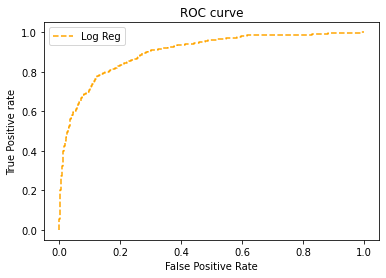

Log Reg ROC-AUC: 0.90141


In [103]:
# строим ROC кривые и вычисляем AUC-ROC
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Log Reg')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()
print('Log Reg ROC-AUC: %.5f' % roc_auc_score(y_test, y_pred))

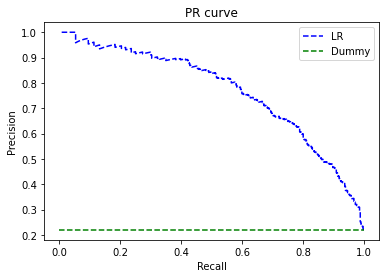

LR PR-AUC: 0.76847
Dummy PR-AUC: 0.21962


In [104]:
from sklearn.metrics import auc
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
plt.plot(recall_lr, precision_lr, linestyle='--',color='blue', label='LR')
dumb = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [dumb, dumb], linestyle='--',color='green', label='Dummy')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(loc='best')
plt.show()
print('LR PR-AUC: %.5f' % auc(recall_lr, precision_lr))
print('Dummy PR-AUC: %.5f' % auc([0, 1], [dumb, dumb]))

Best C:  0.0655128556859551


Text(0, 0.5, 'CV score')

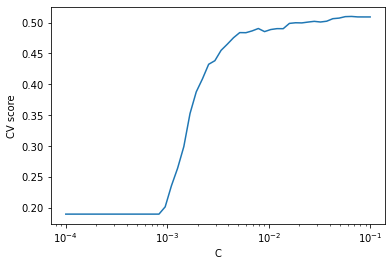

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, make_scorer
cs = np.logspace(-4, -1, 50)

tuned_parameters = [
    {"penalty": ["l2"], "C": cs},
]
clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring=make_scorer(average_precision_score))
clf.fit(X_train, y_train)
print("Best C: ", clf.best_params_['C'])

plt.plot(cs, clf.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")

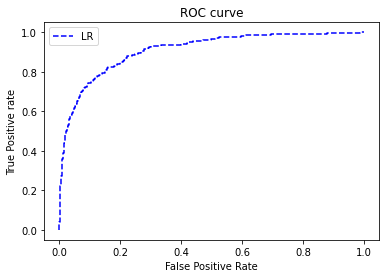

LR ROC-AUC: 0.90948


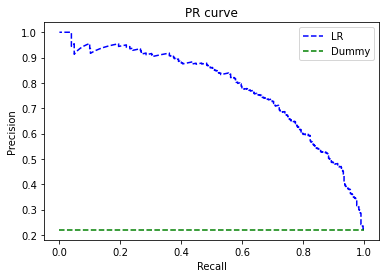

LR PR-AUC: 0.77969
Dummy PR-AUC: 0.21962


In [106]:
lr_pred = clf.decision_function(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred, pos_label=1)
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='blue', label='LR')
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_pred, pos_label=1)
# plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Dummy')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()
print('LR ROC-AUC: %.5f' % roc_auc_score(y_test, lr_pred))
# print('Dummy ROC-AUC: %.5f' % roc_auc_score(y_test, dummy_pred[:, 1]))

# строим PR кривые и вычисляем AUC-PR
plt.plot(recall_lr, precision_lr, linestyle='--',color='blue', label='LR')
plt.plot([0, 1], [dumb, dumb], linestyle='--',color='green', label='Dummy')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(loc='best')
plt.show()
print('LR PR-AUC: %.5f' % auc(recall_lr, precision_lr))
print('Dummy PR-AUC: %.5f' % auc([0, 1], [dumb, dumb]))

In [107]:
lr_pred = clf.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, lr_pred))
print("F1 score : ", f1_score(y_test, lr_pred, average="macro"))
print("Precision score : ", precision_score(y_test, lr_pred, average="macro"))
print("Recall score : ", recall_score(y_test, lr_pred, average="macro"))
print('ROC-AUC: ', roc_auc_score(y_test, lr_pred))

Accuracy score :  0.8779867819013727
F1 score :  0.7985889966312039
Precision score :  0.8542111577684464
Recall score :  0.767132645674991
ROC-AUC:  0.767132645674991


In [109]:
log_reg.intercept_

array([-1.31894551])

In [85]:
log_reg.coef_

array([[ 1.67731221e-01,  9.81788723e-02, -1.24638927e-10,
         8.22043453e-03,  1.33275424e-01,  7.43456575e-02,
         2.78527760e-01,  3.64283955e-01,  2.67491790e-01,
         1.32416427e-01,  1.57890923e-02,  6.73116662e-01]])

In [110]:
feature_detail

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,LOAN,"(-INF,5900.0]",304,142,162,0.051007,0.467105,1.257674,0.107497,0.249598
1,LOAN,"(5900.0,7600.0]",299,87,212,0.050168,0.290970,0.498766,0.014332,0.249598
2,LOAN,"(7600.0,10000.0]",608,137,471,0.102013,0.225329,0.154567,0.002551,0.249598
3,LOAN,"(10000.0,11400.0]",365,57,308,0.061242,0.156164,-0.297604,0.004945,0.249598
4,LOAN,"(11400.0,12600.0]",347,76,271,0.058221,0.219020,0.118059,0.000840,0.249598
...,...,...,...,...,...,...,...,...,...,...
0,JOB,"[Office, missing]",1227,148,1079,0.205872,0.120619,-0.597134,0.060719,0.115381
1,JOB,[ProfExe],1276,212,1064,0.214094,0.166144,-0.223761,0.010005,0.115381
2,JOB,[Other],2388,554,1834,0.400671,0.231993,0.192353,0.015683,0.115381
3,JOB,[Mgr],767,179,588,0.128691,0.233377,0.200103,0.005463,0.115381


In [115]:
feature_detail[feature_detail['iv'] < 0.02] # not useful for prediction

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,VALUE,"(-INF,+INF)",5960,1189,4771,1.000000,0.199497,6.314432e-08,3.987205e-15,3.987205e-15
0,CLNO,"(-INF,16.0]",2189,467,1722,0.367282,0.213339,8.453104e-02,2.691170e-03,6.046619e-03
1,CLNO,"(16.0,19.0]",742,130,612,0.124497,0.175202,-1.597539e-01,3.025636e-03,6.046619e-03
2,CLNO,"(19.0,+INF)",3029,592,2437,0.508221,0.195444,-2.557298e-02,3.298129e-04,6.046619e-03
0,REASON,[DebtCon],3928,745,3183,0.659060,0.189664,-6.275180e-02,2.546387e-03,7.214471e-03
1,REASON,"[HomeImp, missing]",2032,444,1588,0.340940,0.218504,1.150374e-01,4.668084e-03,7.214471e-03


In [116]:
feature_detail[(feature_detail['iv'] >= 0.02) & (feature_detail['iv'] < 0.1)] # weak predictive power

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,YOJ,"(-INF,-1.0]",515,65,450,0.086409,0.126214,-0.545416,0.021627,0.061009
1,YOJ,"(-1.0,0.0]",486,109,377,0.081544,0.224280,0.148547,0.001880,0.061009
2,YOJ,"(0.0,1.0]",390,90,300,0.065436,0.230769,0.185471,0.002377,0.061009
3,YOJ,"(1.0,2.0]",365,100,265,0.061242,0.273973,0.414884,0.011849,0.061009
4,YOJ,"(2.0,3.0]",331,87,244,0.055537,0.262840,0.358184,0.007890,0.061009
5,YOJ,"(3.0,4.0]",335,75,260,0.056208,0.223881,0.146251,0.001255,0.061009
6,YOJ,"(4.0,5.0]",341,82,259,0.057215,0.240469,0.239335,0.003513,0.061009
7,YOJ,"(5.0,6.0]",323,47,276,0.054195,0.145511,-0.380808,0.006977,0.061009
8,YOJ,"(6.0,+INF)",2874,534,2340,0.482215,0.185804,-0.088067,0.003641,0.061009


In [117]:
feature_detail[(feature_detail['iv'] >= 0.1) & (feature_detail['iv'] < 0.3)] # medium predictive power

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,LOAN,"(-INF,5900.0]",304,142,162,0.051007,0.467105,1.257674,0.107497,0.249598
1,LOAN,"(5900.0,7600.0]",299,87,212,0.050168,0.290970,0.498766,0.014332,0.249598
2,LOAN,"(7600.0,10000.0]",608,137,471,0.102013,0.225329,0.154567,0.002551,0.249598
3,LOAN,"(10000.0,11400.0]",365,57,308,0.061242,0.156164,-0.297604,0.004945,0.249598
4,LOAN,"(11400.0,12600.0]",347,76,271,0.058221,0.219020,0.118059,0.000840,0.249598
5,LOAN,"(12600.0,13900.0]",377,62,315,0.063255,0.164456,-0.235994,0.003275,0.249598
6,LOAN,"(13900.0,15000.0]",322,94,228,0.054027,0.291925,0.503393,0.015741,0.249598
7,LOAN,"(15000.0,17000.0]",556,91,465,0.093289,0.163669,-0.241734,0.005059,0.249598
8,LOAN,"(17000.0,18700.0]",392,45,347,0.065772,0.114796,-0.653217,0.022787,0.249598
9,LOAN,"(18700.0,21000.0]",464,90,374,0.077852,0.193966,-0.035002,0.000094,0.249598


In [118]:
feature_detail[(feature_detail['iv'] >= 0.3) & (feature_detail['iv'] < 0.5)] # strong predictive power

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,DEROG,"(-INF,-1.0]",708,87,621,0.118792,0.122881,-0.575979,0.032825,0.347189
1,DEROG,"(-1.0,0.0]",4527,754,3773,0.759564,0.166556,-0.220790,0.034592,0.347189
2,DEROG,"(0.0,+INF)",725,348,377,0.121644,0.480000,1.309401,0.279772,0.347189


In [119]:
feature_detail[feature_detail['iv'] > 0.5] # sus predictive power

,var_name,split_list,sub_total_sample_num,positive_sample_num,negative_sample_num,sub_total_num_percentage,positive_rate_in_sub_total,woe_list,iv_list,iv
0,DELINQ,"(-INF,-1.0]",580,72,508,0.097315,0.124138,-0.564371,0.025917,0.565325
1,DELINQ,"(-1.0,0.0]",4179,583,3596,0.701174,0.139507,-0.429947,0.113245,0.565325
2,DELINQ,"(0.0,1.0]",654,222,432,0.109732,0.339450,0.723695,0.069594,0.565325
3,DELINQ,"(1.0,+INF)",547,312,235,0.091779,0.570384,1.672861,0.356570,0.565325
0,DEBTINC,"(-INF,-1.0]",1267,786,481,0.212584,0.620363,1.880533,1.053554,1.848128
1,DEBTINC,"(-1.0,21.0]",331,27,304,0.055537,0.081571,-1.031744,0.042312,1.848128
2,DEBTINC,"(21.0,36.0]",2608,159,2449,0.437584,0.060966,-1.345087,0.510573,1.848128
3,DEBTINC,"(36.0,40.0]",1182,72,1110,0.198322,0.060914,-1.346005,0.231648,1.848128
4,DEBTINC,"(40.0,+INF)",572,145,427,0.095973,0.253497,0.309393,0.010041,1.848128


In [129]:
feature_detail[feature_detail['iv'] < 0.02]['var_name'].unique()

array(['VALUE', 'CLNO', 'REASON'], dtype=object)

In [130]:
# drop weak predictive power features
X_new_train = X_train.drop(columns=['VALUE', 'CLNO', 'REASON'])
X_new_test = X_test.drop(columns=['VALUE', 'CLNO', 'REASON'])

Best C:  0.0655128556859551


Text(0, 0.5, 'CV score')

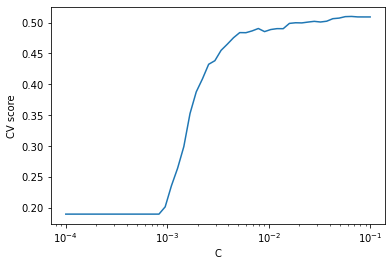

In [131]:
cs = np.logspace(-4, -1, 50)

tuned_parameters = [
    {"penalty": ["l2"], "C": cs},
]
clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring=make_scorer(average_precision_score))
clf.fit(X_train, y_train)
print("Best C: ", clf.best_params_['C'])

plt.plot(cs, clf.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")

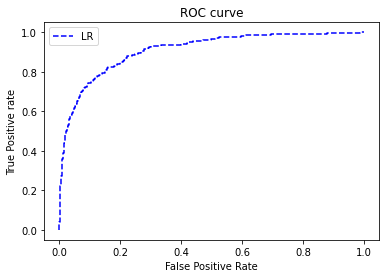

LR ROC-AUC: 0.90948


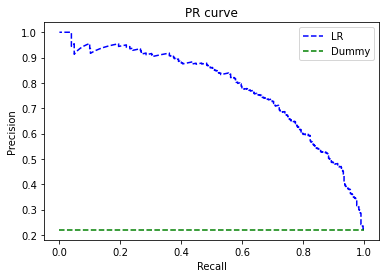

LR PR-AUC: 0.77969
Dummy PR-AUC: 0.21962


In [132]:
lr_pred = clf.decision_function(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred, pos_label=1)
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='blue', label='LR')
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_pred, pos_label=1)
# plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Dummy')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()
print('LR ROC-AUC: %.5f' % roc_auc_score(y_test, lr_pred))
# print('Dummy ROC-AUC: %.5f' % roc_auc_score(y_test, dummy_pred[:, 1]))

# строим PR кривые и вычисляем AUC-PR
plt.plot(recall_lr, precision_lr, linestyle='--',color='blue', label='LR')
plt.plot([0, 1], [dumb, dumb], linestyle='--',color='green', label='Dummy')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(loc='best')
plt.show()
print('LR PR-AUC: %.5f' % auc(recall_lr, precision_lr))
print('Dummy PR-AUC: %.5f' % auc([0, 1], [dumb, dumb]))

In [133]:
lr_pred = clf.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, lr_pred))
print("F1 score : ", f1_score(y_test, lr_pred, average="macro"))
print("Precision score : ", precision_score(y_test, lr_pred, average="macro"))
print("Recall score : ", recall_score(y_test, lr_pred, average="macro"))
print('ROC-AUC: ', roc_auc_score(y_test, lr_pred))

Accuracy score :  0.8779867819013727
F1 score :  0.7985889966312039
Precision score :  0.8542111577684464
Recall score :  0.767132645674991
ROC-AUC:  0.767132645674991
